<table>
    <tr><td align="right" style="background-color:#ffffff;">
        <img src="../images/logo.jpg" width="20%" align="right">
    </td></tr>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        Abuzer Yakaryilmaz | April 04, 2019 (updated) 
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2> <font color="blue"> Solutions for </font>Two Qubits</h2>

<a id="task2"></a>
<h3> Task 2 </h3>

Create a quantum curcuit with $ n=5 $ qubits.

Set each qubit to $ \ket{1} $.

Repeat 4 times:
<ul>
    <li>Randomly pick a pair of qubits, and apply cx-gate (CNOT operator) on the pair.</li>
</ul>

Draw your circuit, and execute your program 100 times.

Verify your measurement results by checking the diagram of the circuit. 

<h3> Solution </h3>

In [1]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
# import randrange for random choices
from random import randrange

n = 5
m = 4

states_of_qubits = [] # we trace the state of each qubit also by ourselves

qreg1 =  QuantumRegister(n) # quantum register with n qubits
creg1 = ClassicalRegister(n) # classical register with n bits

mycircuit1 = QuantumCircuit(qreg1,creg1) # quantum circuit with quantum and classical registers

# set each qubit to |1>
for i in range(n):
    mycircuit1.x(qreg1[i]) # apply x-gate (NOT operator)
    states_of_qubits.append(1) # the state of each qubit is set to 1
    
# randomly pick m pairs of qubits
for i in range(m):
    controller_qubit = randrange(n)
    target_qubit = randrange(n)
    # controller and target qubits should be different
    while controller_qubit == target_qubit: # if they are the same, we pick the target_qubit again
        target_qubit = randrange(n)
    # print our picked qubits
    print("the indices of the controller and target qubits are",controller_qubit,target_qubit)
    # apply cx-gate (CNOT operator)
    mycircuit1.cx(qreg1[controller_qubit],qreg1[target_qubit])
    # we also trace the results
    if states_of_qubits[controller_qubit] == 1: # if the value of the controller qubit is 1,
        states_of_qubits[target_qubit] = 1 - states_of_qubits[target_qubit] # then flips the value of the target qubit 
        # remark that 1-x gives the negation of x
    

# measure the quantum register
mycircuit1.measure(qreg1,creg1)

print("Everything looks fine, let's continue ...")

the indices of the controller and target qubits are 3 4
the indices of the controller and target qubits are 2 4
the indices of the controller and target qubits are 0 4
the indices of the controller and target qubits are 2 1
Everything looks fine, let's continue ...


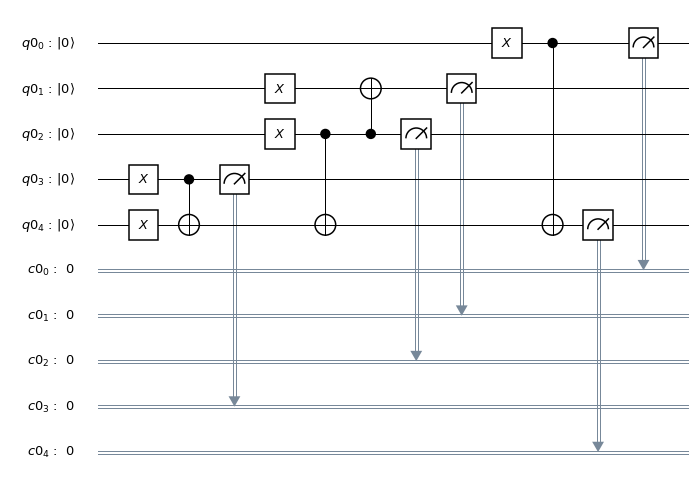

In [3]:
# draw the circuit

mycircuit1.draw(output='mpl')
# re-execute this cell if you DO NOT see the circuit diagram

In [4]:
# execute the circuit 100 times in the local simulator

job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(mycircuit1)

# print the reverse of the outcome
for outcome in counts:
    reverse_outcome = ''
    for i in outcome:
        reverse_outcome = i + reverse_outcome
    print(reverse_outcome,"is observed",counts[outcome],"times")

# the states of the qubits should be as follows based on our own calculation
print(states_of_qubits)

10110 is observed 100 times
[1, 0, 1, 1, 0]


<a id="task3"></a>
<h3>Task 3</h3>

Our task is to learn the behavior of the following quantum circuit by doing experiments.

Our circuit has two qubits. 
<ul>
    <li> Apply Hadamard to the both qubits.
    <li> Apply CNOT(first-qubit,second-qubit).
    <li> Apply Hadamard to the both qubits.
    <li> Measure the circuit.
</ul>

Iteratively initialize  the qubits to $ \ket{00} $, $ \ket{01} $, $ \ket{10} $, and $ \ket{11} $.

Execute your program 100 times for each iteration, and then check the outcomes for each iteration. 

Verify that the overall circuit implements CNOT(second-qubit,first-qubit).

<h3> Solution </h3>

In [5]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['00','01','10','11']

for input in all_inputs:
    qreg2 =  QuantumRegister(2) # quantum register with 2 qubits
    creg2 = ClassicalRegister(2) # classical register with 2 bits
    mycircuit2 = QuantumCircuit(qreg2,creg2) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit2.x(qreg2[0]) # set the state of the first qubit to |1>
    if input[1]=='1':
        mycircuit2.x(qreg2[1]) # set the state of the second qubit to |1>

    # apply h-gate to both qubits
    mycircuit2.h(qreg2[0])
    mycircuit2.h(qreg2[1])

    # apply cx(first-qubit,second-qubit)
    mycircuit2.cx(qreg2[0],qreg2[1])

    # apply h-gate to both qubits
    mycircuit2.h(qreg2[0])
    mycircuit2.h(qreg2[1])

    # measure both qubits
    mycircuit2.measure(qreg2,creg2)
    
    # execute the circuit 100 times in the local simulator
    job = execute(mycircuit2,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(mycircuit2)
    for outcome in counts: # print the reverse of the outcomes
        reverse_outcome = ''
        for i in outcome:
            reverse_outcome = i + reverse_outcome
        print("our input is",input,": ",reverse_outcome,"is observed",counts[outcome],"times")

our input is 00 :  00 is observed 100 times
our input is 01 :  11 is observed 100 times
our input is 10 :  10 is observed 100 times
our input is 11 :  01 is observed 100 times


<a id="task4"></a>
<h3>Task 4</h3>

Our task is to learn the behavior of the following quantum circuit by doing experiments.

Our circuit has two qubits. 
<ul>
    <li> Apply CNOT(first-qubit,second-qubit).
    <li> Apply CNOT(second-qubit,first-qubit).
    <li> Apply CNOT(first-qubit,second-qubit).
</ul>

Iteratively initialize  the qubits to $ \ket{00} $, $ \ket{01} $, $ \ket{10} $, and $ \ket{11} $.

Execute your program 100 times for each iteration, and then check the outcomes for each iteration. 

Verify that the overall circuit swaps the values of the first and second qubits:
<ul>
    <li> $\ket{00} \rightarrow \ket{00} $ </li>
    <li> $\ket{01} \rightarrow \ket{10} $ </li>
    <li> $\ket{10} \rightarrow \ket{01} $ </li>
    <li> $\ket{11} \rightarrow \ket{11} $ </li>
</ul>

<h3> Solution </h3>

In [ ]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['00','01','10','11']

for input in all_inputs:
    qreg3 =  QuantumRegister(2) # quantum register with 2 qubits
    creg3 = ClassicalRegister(2) # classical register with 2 bits
    mycircuit3 = QuantumCircuit(qreg3,creg3) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit3.x(qreg3[0]) # set the value of the first qubit to |1>
    if input[1]=='1':
        mycircuit3.x(qreg3[1]) # set the value of the second qubit to |1>

    # apply cx(first-qubit,second-qubit)
    mycircuit3.cx(qreg3[0],qreg3[1])
    # apply cx(second-qubit,first-qubit)
    mycircuit3.cx(qreg3[1],qreg3[0])
    # apply cx(first-qubit,second-qubit)
    mycircuit3.cx(qreg3[0],qreg3[1])
    
    mycircuit3.measure(qreg3,creg3)
    
    # execute the circuit 100 times in the local simulator
    job = execute(mycircuit3,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(mycircuit3)
    for outcome in counts: # print the reverse of the outcomes
        reverse_outcome = ''
        for i in outcome:
            reverse_outcome = i + reverse_outcome
        print("our input is",input,": ",reverse_outcome,"is observed",counts[outcome],"times")